# LC3 DATA ANALYSIS

### Load libraries and data

In [1]:
# Libraries for general data management
import pandas as pd
import numpy as np

In [2]:
# Libraries for creating and validating models
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
# Libraries for data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
# Input file path (can be also an excel)
DATA_PATH = './data/data_merged.xlsx'

In [6]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

# Read data skipping the first row and considering '-' as NaN
data = pd.read_excel(DATA_PATH, skiprows=[0], na_values=['-'])

# Get useful dataframe information
#data.describe()    # Get data general information
#data.columns       # Get data features names
#data.corr()        # Get correlation matrix

data.rename(columns = {'Calcined kaolinite content (%)':'Calcined_kaolinite_content'}, inplace = True)
data.rename(columns = {'Dv,50 (µm)':'Dv_50'}, inplace = True)
data.rename(columns = {'BET Specific surface (m2/g)':'BET_Specific_surface'}, inplace = True)
data.rename(columns = {'1D':'day_1'}, inplace = True)
data.rename(columns = {'3D':'day_3'}, inplace = True)
data.rename(columns = {'7D':'day_7'}, inplace = True)
data.rename(columns = {'28D':'day_28'}, inplace = True)
data.rename(columns = {'90D':'day_90'}, inplace = True)
data
# Replace MV by mean
#data = data.fillna(data.mean()) 


,Clay,day_1,STD,day_3,STD.1,day_7,STD.2,day_28,STD.3,day_90,...,CaO,MgO,SO3,Na2O,K2O,TiO2,P2O5,MnO,Others,LOI
0,B45 Quartz B250,7.808750,0.251891,18.683750,0.328841,26.073438,0.696464,29.168750,0.541867,30.062500,...,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,0.100000
1,B45 India3 750°C,9.403125,0.189520,21.560417,1.963092,29.157500,0.868001,37.515625,0.555407,40.345312,...,0.600000,0.700000,NaN,0.100000,2.300000,0.800000,0.100000,0.100000,0.200000,0.500000
2,B45 Brazil2,9.856250,0.306569,24.558750,0.830034,39.638750,0.894552,46.975000,0.501482,47.657812,...,0.500000,NaN,NaN,NaN,0.300000,1.500000,NaN,NaN,NaN,1.400000
3,B45 Thailand 750°C,10.083750,0.133507,25.482500,0.695962,41.887500,1.548966,54.911250,2.384772,58.546250,...,1.300000,0.800000,0.100000,0.400000,0.200000,2.400000,0.400000,0.100000,0.200000,1.700000
4,B45 Suriname1,12.016250,0.357853,32.342188,1.288414,45.941250,2.145351,55.303750,1.330976,58.403750,...,NaN,NaN,NaN,NaN,0.100000,1.800000,0.100000,NaN,0.200000,3.600000
5,B45 India1 750°C,13.183750,0.566334,30.173750,0.726647,52.091250,1.006780,64.031250,4.819113,63.318750,...,0.100000,0.100000,NaN,0.100000,0.100000,2.400000,0.100000,NaN,0.200000,1.000000
6,B45 Burgess,14.972396,0.509349,38.297500,2.049959,59.202083,0.140498,67.343750,2.014783,68.942188,...,NaN,NaN,0.100000,0.300000,0.100000,1.500000,0.200000,NaN,0.100000,1.500000
7,B45 Loma Sur,10.081250,0.153793,23.618750,1.293184,38.528750,0.531298,49.446875,1.382842,51.429688,...,0.300000,1.000000,NaN,NaN,0.400000,1.100000,NaN,NaN,NaN,1.900000
8,B45 Suriname 2,13.837500,0.386524,33.832813,0.760934,49.710938,1.642893,57.896875,0.602199,60.131520,...,NaN,NaN,NaN,NaN,0.100000,1.800000,0.100000,NaN,0.200000,3.600000
9,India 2,9.854688,0.516205,23.387500,1.201139,39.750000,0.608383,54.789583,0.768936,60.350000,...,0.122000,0.079000,NaN,0.205000,0.245000,2.191000,NaN,NaN,NaN,0.610000


### Visualize data

In [7]:
# Take kaolinite and compression strength
x = data['Calcined_kaolinite_content'].values # (Pandas dataframe).values = numpy array
y1  = data[ "day_1"].values
y3  = data[ "day_3"].values
y7  = data[ "day_7"].values
y28 = data["day_28"].values
y90 = data["day_90"].values

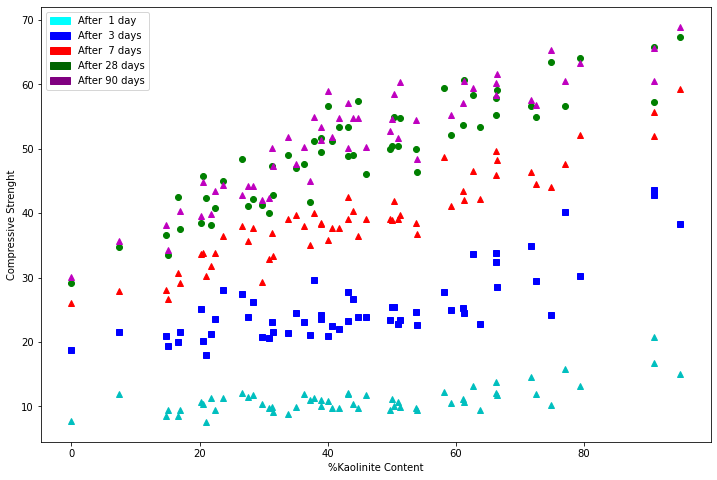

In [8]:
# Show points using matplotlib.pyplot library
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(x,y1,'c^',x,y3,'bs',x,y7,'r^',x,y28,'go', x,y90,'m^')
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')

d1_patch  = mpatches.Patch(color='cyan',      label='After  1 day')
d3_patch  = mpatches.Patch(color='blue',      label='After  3 days')
d7_patch  = mpatches.Patch(color='red',       label='After  7 days')
d28_patch = mpatches.Patch(color='darkgreen', label='After 28 days')
d90_patch = mpatches.Patch(color='purple',    label='After 90 days')
plt.legend(handles=[d1_patch,d3_patch,d7_patch,d28_patch,d90_patch])

plt.show()

### Data correlation analysis

In [9]:
# Function to hightlight high correlated cells in red
def highlight_high_correlations(cell):
    return 'background-color: %s' % ('red' if (cell != 1 and abs(cell) > CORRELATION_THRESHOLD) else 'white')

In [10]:
# Correlation between Compression Strength measurements and clays properties
CORRELATION_THRESHOLD = 0.6

corr_matrix = data.corr()[10:].iloc[:, 0:9]
corr_matrix.style.applymap(highlight_high_correlations)

,day_1,STD,day_3,STD.1,day_7,STD.2,day_28,STD.3,day_90
Calcined_kaolinite_content,0.672115,0.082912,0.772572,0.444221,0.931003,0.177116,0.898135,0.328974,0.910680
Dv_50,-0.111246,-0.118125,-0.011320,-0.129720,-0.116061,-0.113932,-0.146193,-0.185816,-0.152193
D10,-0.274278,-0.159055,-0.351558,-0.401368,-0.296297,-0.215840,-0.287737,-0.224444,-0.290692
D90,-0.225330,-0.018398,-0.169381,-0.070994,-0.147715,-0.032689,-0.131897,-0.082954,-0.141472
Span (-),-0.008618,0.020704,0.096408,0.055594,0.176071,0.044010,0.178734,0.022846,0.099044
BET_Specific_surface,-0.077832,-0.345532,-0.032558,0.010624,0.083831,-0.092784,0.108786,0.131376,0.198791
SiO2,-0.430950,0.006149,-0.443933,-0.302855,-0.563664,-0.086754,-0.579837,-0.322744,-0.635442
Al2O3,0.614406,0.029920,0.705345,0.394946,0.834569,0.248389,0.809226,0.322680,0.845753
Fe2O3,-0.268702,-0.137893,-0.284461,-0.100728,-0.265054,-0.108874,-0.259344,0.004947,-0.242389
CaO,-0.171936,0.140246,-0.143753,0.012872,-0.217687,-0.146547,-0.181013,-0.101726,-0.136114


In [11]:
# Correlation between clays properties themselves
CORRELATION_THRESHOLD = 0.75

corr_matrix = data.corr()[10:].iloc[:, 10:]
corr_matrix.style.applymap(highlight_high_correlations)

,Calcined_kaolinite_content,Dv_50,D10,D90,Span (-),BET_Specific_surface,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,Na2O,K2O,TiO2,P2O5,MnO,Others,LOI
Calcined_kaolinite_content,1.000000,-0.193500,-0.305015,-0.244189,0.084792,0.091568,-0.662171,0.916967,-0.253895,-0.201540,-0.334250,0.015434,-0.197303,-0.411571,0.415086,-0.036408,0.318173,0.023426,0.232083
Dv_50,-0.193500,1.000000,0.451829,0.776255,0.119163,-0.015583,0.287292,-0.242921,-0.189271,0.042118,0.052258,0.077456,-0.096222,0.074709,-0.006009,0.385650,0.255514,-0.084343,-0.230361
D10,-0.305015,0.451829,1.000000,-0.035547,-0.436280,-0.404479,0.382222,-0.145179,-0.431953,-0.214363,-0.187739,0.225985,0.012912,0.618675,-0.589368,0.378885,-0.771972,-0.200548,-0.064193
D90,-0.244189,0.776255,-0.035547,1.000000,0.736569,-0.089815,0.193764,-0.340139,-0.028480,0.342000,0.365395,0.975371,-0.132507,0.047146,-0.043585,0.138796,-0.142464,-0.011756,-0.171109
Span (-),0.084792,0.119163,-0.436280,0.736569,1.000000,0.101806,-0.072553,-0.042011,0.082441,0.072997,-0.075898,0.033117,-0.094787,-0.161342,0.197525,-0.029135,0.115944,-0.168370,-0.043502
BET_Specific_surface,0.091568,-0.015583,-0.404479,-0.089815,0.101806,1.000000,-0.421059,0.052440,0.619421,-0.100527,0.147891,-0.151082,-0.016290,-0.183056,0.099011,-0.142684,0.643980,-0.342051,0.152745
SiO2,-0.662171,0.287292,0.382222,0.193764,-0.072553,-0.421059,1.000000,-0.725183,-0.364198,-0.108063,-0.181542,-0.208559,-0.144506,0.130411,-0.410854,-0.038594,-0.305488,0.057821,-0.390461
Al2O3,0.916967,-0.242921,-0.145179,-0.340139,-0.042011,0.052440,-0.725183,1.000000,-0.282481,-0.211962,-0.286575,-0.169586,-0.213801,-0.315134,0.369314,-0.051612,0.372933,-0.036482,0.308423
Fe2O3,-0.253895,-0.189271,-0.431953,-0.028480,0.082441,0.619421,-0.364198,-0.282481,1.000000,0.004174,0.231275,0.008352,0.158245,-0.114540,0.208177,0.095215,0.104339,-0.108749,-0.060084
CaO,-0.201540,0.042118,-0.214363,0.342000,0.072997,-0.100527,-0.108063,-0.211962,0.004174,1.000000,0.569413,0.625109,0.496111,-0.086462,-0.304487,-0.135553,-0.081563,0.128110,0.067826


In [12]:
# Relevant clay properties, first row show the number of non missing values
data_restricted = data[['Calcined_kaolinite_content', 'Dv_50', 'BET_Specific_surface', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'K2O', 'TiO2']]
data_restricted.describe()

,Calcined_kaolinite_content,Dv_50,BET_Specific_surface,Al2O3,Fe2O3,CaO,MgO,K2O,TiO2
count,58.000000,49.000000,48.000000,57.000000,57.000000,48.000000,50.000000,57.000000,55.000000
mean,44.574828,10.528980,19.918333,27.802180,5.708837,1.033639,0.586760,1.241594,1.260112
std,21.729599,7.300482,14.441748,8.750739,5.298461,1.785167,0.598484,1.598637,0.766232
min,0.000000,3.300000,1.200000,10.680412,0.300000,0.050000,0.054522,0.050000,0.000000
25%,28.675000,5.300000,11.575000,21.635000,1.056000,0.114250,0.232021,0.108247,0.726091
50%,42.465000,7.800000,15.900000,26.700000,4.529000,0.310038,0.383739,0.535870,1.100000
75%,60.610000,13.300000,23.525000,35.050000,8.900000,0.895421,0.696000,2.158000,1.800000
max,95.000000,29.700000,71.700000,43.800000,20.853000,7.719000,2.641000,9.314000,3.546000


Preprocessing data to work with 2 variables. We create a dataframe with every data available for each case because in each case we have NaN in different places.

In [13]:
dataDV50 = data.copy()
dataDV50 = dataDV50[['Calcined_kaolinite_content', 'Dv_50', 'day_1']].dropna()
feature_cols_Kaoli_DV50 = ['Calcined_kaolinite_content', 'Dv_50']
X_K_Dv50 = dataDV50[feature_cols_Kaoli_DV50]
y1_Dv50 = dataDV50['day_1']

In [14]:
dataBET = data.copy()
dataBET = dataBET[['Calcined_kaolinite_content', 'BET_Specific_surface', 'day_3','day_7', 'day_90']].dropna()
feature_cols_Kaoli_BET = ['Calcined_kaolinite_content', 'BET_Specific_surface']
X_K_BET = dataBET[feature_cols_Kaoli_BET]
y3_BET = dataBET['day_3']
y7_BET = dataBET['day_7'] 
y90_BET = dataBET['day_90']

In [15]:
# although day90 also uses BET, it is a special case, because it is the only day that has NaN so if we 
#put it in the df above we would be throwing valid values for the rest of the days.
dataBET90 = data.copy()
dataBET90 = dataBET90[['Calcined_kaolinite_content', 'BET_Specific_surface', 'day_90']].dropna()
feature_cols_Kaoli_BET90 = ['Calcined_kaolinite_content', 'BET_Specific_surface']
X_K_BET = dataBET[feature_cols_Kaoli_BET90]
y90_BET = dataBET['day_90']

In [16]:
dataTiO = data.copy()
dataTiO = dataTiO[['Calcined_kaolinite_content', 'TiO2', 'day_28']].dropna()
feature_cols_Kaoli_TiO = ['Calcined_kaolinite_content', 'TiO2']
X_K_TiO = dataTiO[feature_cols_Kaoli_TiO]
y28_TiO = dataTiO['day_28']


In [17]:
# Leave one out cross validation for linear regression model considering only Kaolinite content
def leave_one_out_validation(x, y, model=LinearRegression()):
    l  = []
    cv = LeaveOneOut()
    for train_ix, test_ix in cv.split(x):
        x_train, x_test = x[train_ix], x[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        model.fit(x_train, y_train)
    
        y_pred = model.predict(x_test)
      
    
        l.append(mean_squared_error(y_test, y_pred))
    
    print("Model mean squared error: "+ str(sum(l)/len(l)))
   

In [18]:
# Add ones column to have w0 variable also in the linear regression
x = np.c_[np.ones(x.shape[0]), x]

In [19]:
leave_one_out_validation(x, y1)

Model mean squared error: 2.966931960885786


In [20]:
leave_one_out_validation(x, y3)

Model mean squared error: 14.108778240146798


In [21]:
leave_one_out_validation(x, y7)

Model mean squared error: 7.03999861197682


In [22]:
leave_one_out_validation(x, y28)

Model mean squared error: 14.4140746449256


In [23]:
# We have to handle NaN
data2 = data.copy()
data2 = data2[data2['day_90'].notna()]
data2
x = data2['Calcined_kaolinite_content'].values
x = np.c_[np.ones(x.shape[0]), x]
y90 = data2["day_90"].values
leave_one_out_validation(x, y90)

Model mean squared error: 13.541515282787252


In [24]:
#data_restricted


In [25]:
mod = smf.ols(formula='day_1 ~ Calcined_kaolinite_content', data=data)
np.random.seed(2)
res = mod.fit()
print("R squared 1 variable day 1, Kaolinite {}".format(res.rsquared))

R squared 1 variable day 1, Kaolinite 0.4517382370956148


In [26]:
mod = smf.ols(formula='day_1 ~ Calcined_kaolinite_content + Dv_50 ', data=dataDV50)
np.random.seed(2)
res = mod.fit()
print("R squared all variables day 1,  {}".format(res.rsquared))

R squared all variables day 1,  0.5592509529046098


In [27]:
mod = smf.ols(formula='day_3 ~ Calcined_kaolinite_content', data=data)
np.random.seed(2)
res = mod.fit()
print("R squared 1 variable day 3, Kaolinite {}".format(res.rsquared))

R squared 1 variable day 3, Kaolinite 0.5968668242735542


In [28]:
mod = smf.ols(formula='day_3 ~ Calcined_kaolinite_content + BET_Specific_surface ', data=dataBET)
np.random.seed(2)
res = mod.fit()
print("R squared all day 3, all {}".format(res.rsquared))

R squared all day 3, all 0.7108569100243539


In [29]:
mod = smf.ols(formula='day_7 ~ Calcined_kaolinite_content', data=data)
np.random.seed(2)
res = mod.fit()
print("R squared 1 variable day 7, Kaolinite {}".format(res.rsquared))

R squared 1 variable day 7, Kaolinite 0.8667669637129656


In [30]:
mod = smf.ols(formula='day_7 ~ Calcined_kaolinite_content  + BET_Specific_surface', data=dataBET)
np.random.seed(2)
res = mod.fit()
print("R squared all variable day 7, all {}".format(res.rsquared))

R squared all variable day 7, all 0.9077168164404515


In [31]:
mod = smf.ols(formula='day_28 ~ Calcined_kaolinite_content', data=data)
np.random.seed(2)
res = mod.fit()
print("R squared 1 variable day 28, Kaolinite {}".format(res.rsquared))

R squared 1 variable day 28, Kaolinite 0.8066458956382336


In [32]:
mod = smf.ols(formula='day_28 ~ Calcined_kaolinite_content +  TiO2', data=dataTiO)
np.random.seed(2)
res = mod.fit()
print("R squared all variable day 28, all {}".format(res.rsquared))

R squared all variable day 28, all 0.823028396460575


In [33]:
mod = smf.ols(formula='day_90~ Calcined_kaolinite_content', data=data2)
np.random.seed(2)
res = mod.fit()
print("R squared 1 variable day 90, Kaolinite {}".format(res.rsquared))

R squared 1 variable day 90, Kaolinite 0.8293385347504323


In [34]:
mod = smf.ols(formula='day_90 ~ Calcined_kaolinite_content + BET_Specific_surface', data=dataBET90)
np.random.seed(2)
res = mod.fit()
print("R squared all variable day 90, all {}".format(res.rsquared))

R squared all variable day 90, all 0.8448442296004056


In [35]:
# IMPLEMENTACION wapa

In [39]:
def leave_one_out_validation_pro(X, y):
    lin_reg = LinearRegression()  # create the model
    lin_reg.fit(X, y)  # train it
    
    for f in range(len(feature_cols)):
        print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
    print(lin_reg.intercept_)

    # cross_val_predict returns an array of the same size as `y` where each entry
    # is a prediction obtained by cross validation:
    predicted = cross_val_predict(lin_reg, X, y, cv=LeaveOneOut())

    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(y, predicted, edgecolors=(0, 0, 0))
    ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
    ax.set_xlabel('Original')
    ax.set_ylabel('Predicted')
    plt.show()
    # Mean squared_error
    print("MSE: {}".format(mean_squared_error(y, predicted)))
    print("R^2: {}".format(lin_reg.score(X,y)))
    
    

### 1 variable 

In [40]:
# X with one single varaibele
feature_cols = ['Calcined_kaolinite_content']
X = data[feature_cols]

0.068491273732168 * Calcined_kaolinite_content + 
8.05198896346206


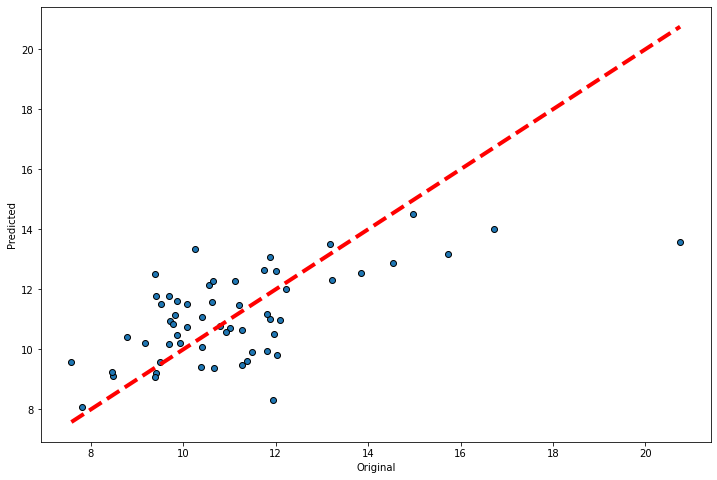

MSE: 2.966931960885787
R^2: 0.45173823709561456


In [41]:
leave_one_out_validation_pro(X, y1)

0.20204648367205716 * Calcined_kaolinite_content + 
16.605723850516164


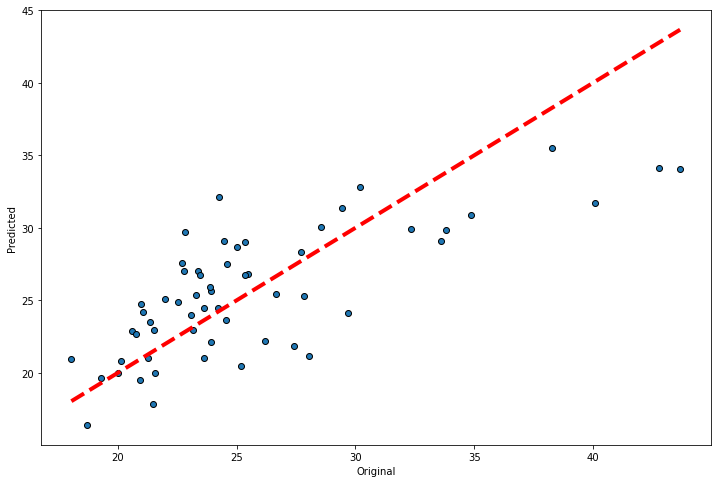

MSE: 14.108778240146794
R^2: 0.5968668242735542


In [43]:
leave_one_out_validation_pro(X, y3)

0.3027385109008508 * Calcined_kaolinite_content + 
25.693736225890852


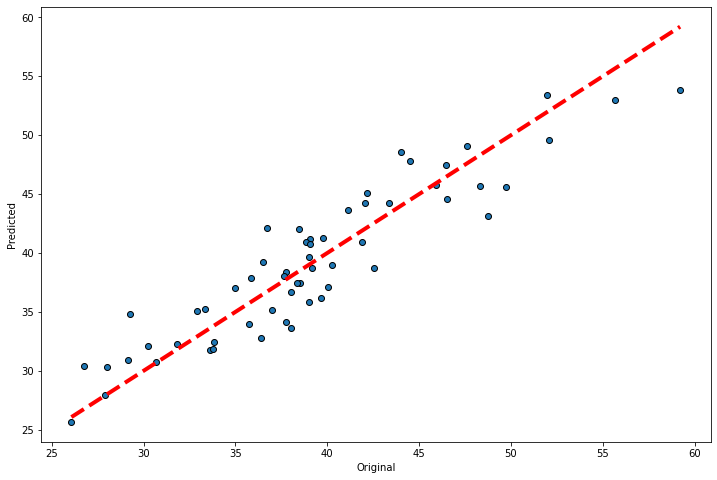

MSE: 7.03999861197682
R^2: 0.8667669637129656


In [44]:
leave_one_out_validation_pro(X, y7)

0.34673217282153335 * Calcined_kaolinite_content + 
34.101696540217716


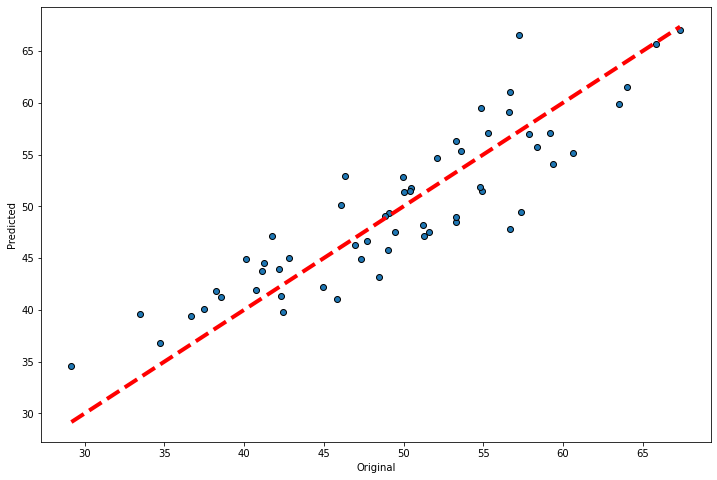

MSE: 14.414074644925599
R^2: 0.8066458956382335


In [45]:
leave_one_out_validation_pro(X, y28)

0.36186994466023364 * Calcined_kaolinite_content + 
35.26614365142824


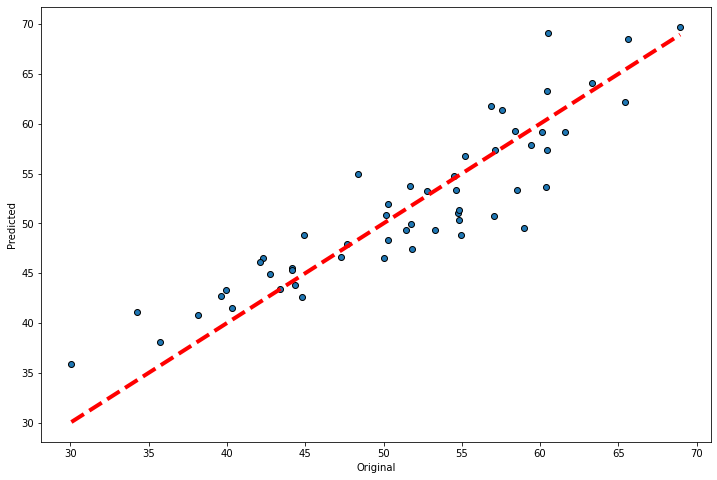

MSE: 13.541515282787259
R^2: 0.8293385347504322


In [46]:
feature_cols = ['Calcined_kaolinite_content']
X = data2[feature_cols]
leave_one_out_validation_pro(X, y90)

### 2 variables 

In [47]:
# X with two varaibele ( Kaolinite + day1-DV50, day3-Bet_surface, day7-Bet_Surface, day28-TiO2, day90-Bet_Surface)

0.07964155491013962 * Calcined_kaolinite_content + 
7.533634227850409


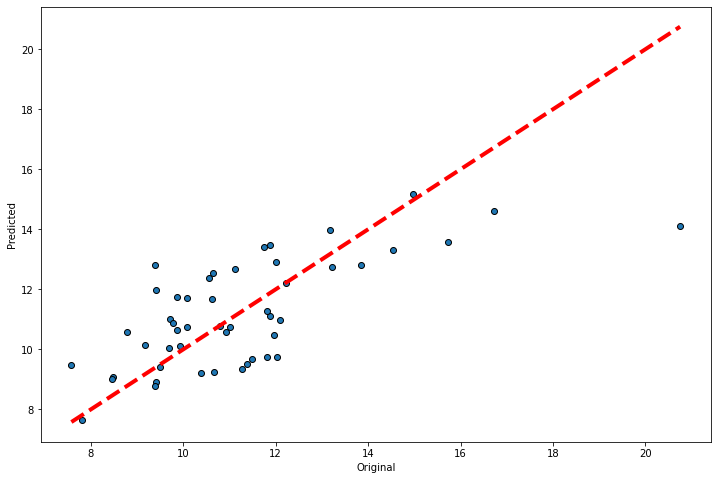

MSE: 2.8259195567201973
R^2: 0.5592509529046099


In [51]:
leave_one_out_validation_pro(X_K_Dv50, y1_Dv50)

0.23029553636472214 * Calcined_kaolinite_content + 
17.016498450545967


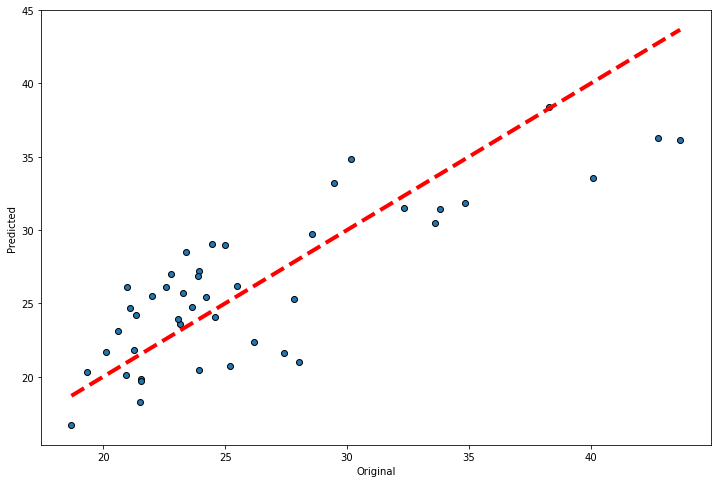

MSE: 12.619681507076537
R^2: 0.710856910024354


In [52]:
leave_one_out_validation_pro(X_K_BET, y3_BET)

0.3097253286026902 * Calcined_kaolinite_content + 
25.787012604973647


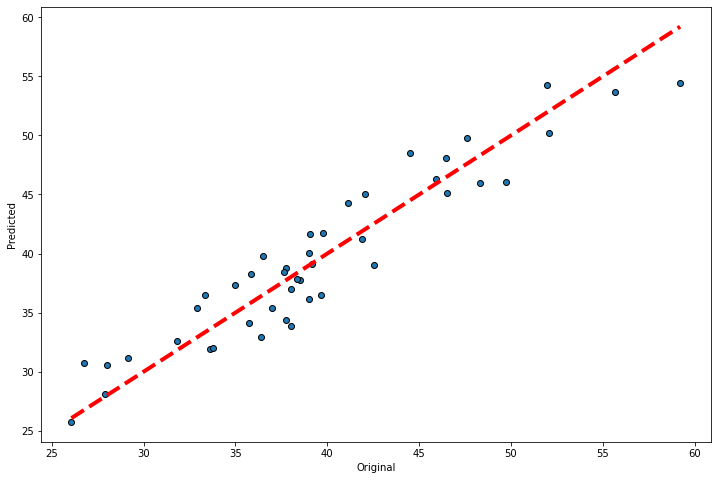

MSE: 5.910854926193249
R^2: 0.9077168164404515


In [53]:
leave_one_out_validation_pro(X_K_BET, y7_BET)

0.32860281354273535 * Calcined_kaolinite_content + 
33.46364412424685


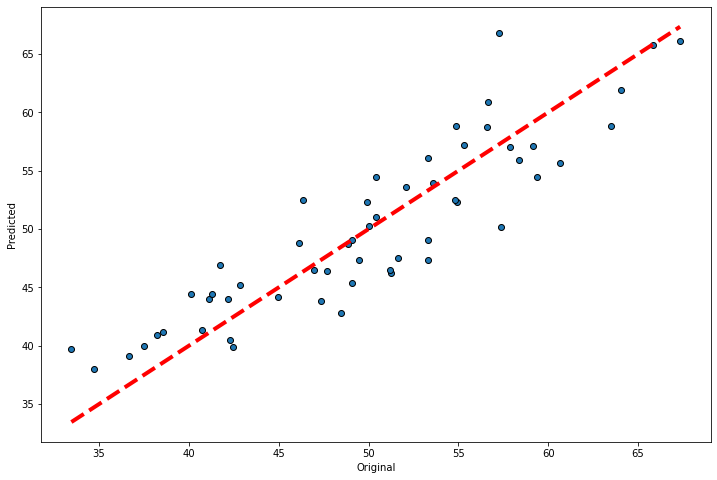

MSE: 12.784112022829714
R^2: 0.823028396460575


In [54]:
leave_one_out_validation_pro(X_K_TiO, y28_TiO)

0.3561682960465458 * Calcined_kaolinite_content + 
34.730256261604715


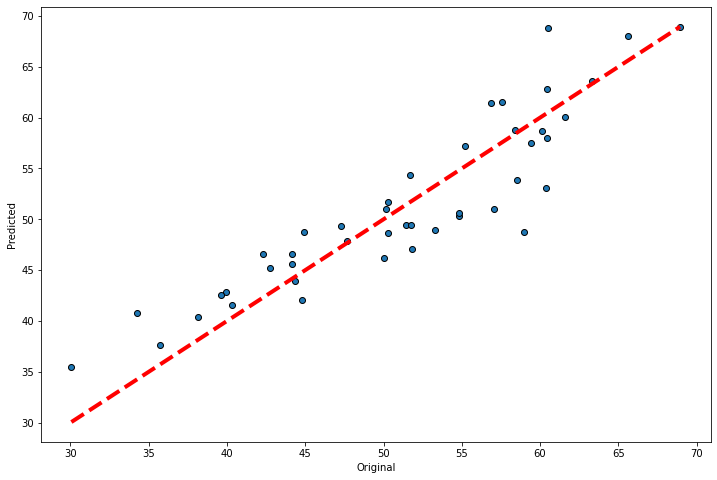

MSE: 14.129796410756013
R^2: 0.8448442296004056


In [55]:
leave_one_out_validation_pro(X_K_BET, y90_BET)